In [1]:
import csv
import pandas as pd
from sklearn.model_selection import train_test_split

from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.utils.np_utils import to_categorical
from keras.models import Sequential, Model
from keras.layers import Dense, Embedding, Activation, merge, Input, Lambda, Reshape
from keras.layers import Conv1D, Flatten, Dropout, MaxPool1D, GlobalMaxPooling1D
from keras.layers import  BatchNormalization

Using TensorFlow backend.


In [2]:
# 讀入CSV檔案
df = pd.read_csv('preprocessing_output/segmented_news.csv')


In [3]:
df.count

<bound method DataFrame.count of            類別                             title  \
0        news             孫安佐案28日開庭李文估「至少要5年服刑」   
1        news             柯智棠首戰TICC全家動員文青開唱耍流浪風   
2        news               安那攻蛋尬舞打頭陣替阿妹外送珍奶挺舞團   
3        news           【狗仔偷拍】邵雨薇瘦到令人擔心紙片人連道具都吃   
4        news               海倫清桃評選台越小姐舊愛新歡齊聚給祝福   
5        news           夏于喬《粽邪》可望搶「鬼后」她難回現實泣不成聲   
6        news             【有雷】《延禧》大結局受注目她吐黑血超虐心   
7        news            傅達仁兒繼承遺志推《安樂法》號召全民連署公投   
8        news                 魏嘉瑩眼睛「被帥傷」揪元兇竟是鼓鼓   
9        news  Red Velvet加入9月韓星大戰！922、923台大連唱2天   
10       news              agnès b.小羊飾品發想來自她的暱稱   
11       news                   「純妃」賞夏姿秀俠女徐楓相見歡   
12       news             防彈新歌MV再破紀錄網友驚見《蘋果》動新聞   
13       news          不搞笑！網紅三原深情飆鄧紫棋夯歌日文發音融化網友   
14       news              《延禧》莫蘭迪色正夯～指彩跟風玩灰階美色   
15       news             【狗仔偷拍】路嘉怡素顏當網美尪兼挑夫賞蜜桃   
16       news               鍾麗緹替老公拼香火20歲混血長女有話說   
17       news                孫安佐子彈火力總評估最重判10年徒刑  

In [4]:
# 隨機20條新聞
train= df.sample(20)
test = df.sample(20)

In [5]:
df.columns

Index(['類別', 'title', 'new content'], dtype='object')

In [6]:
#all data
content=df['new content']
target=df['類別']


#train
train_content=train['new content']
train_target=train['類別']

#test
test_content=test['new content']
test_target=test['類別']

In [7]:
print(train_content)
print("-------------")
print(train_target)
print("-------------")
print(test_content)
print("-------------")
print(test_target)
print("-------------")

564     ['知人知面不知心', '屏東', '一名', '女', '大生', '幾年', '前', ...
297     ['夾子', '電動', '樂隊', '主唱', '小應', '應蔚民', '曾以', '電...
157     ['更新', '調整', '內文', '圖說', '午後', '製', '麵', '廠', ...
510     ['新增', '二版', '影片', '案情', '台北市', '文', '山區', '木柵...
212     ['新增', '影片', '中國', '網劇', '延禧', '攻略', '熱爆', '飾演...
710     ['日本', '四國', '愛媛縣', '青島', '小小', '島上', '大批', '貓...
29      ['台視', '台灣', '名人堂', '專訪', '演藝圈', '中', '百無禁忌', ...
557     ['桃園市', '中壢', '警', '分局', '龍興', '派出所', '昨', '深夜...
471     ['香港', '台會', '男友', '黃', '姓', '女子', '昨晚', '男友',...
886     ['熱', '低壓', '豪雨', '侵襲', '中南部', '第四天', '蘋果', '挺...
948     ['農曆', '七月', '忌諱', '夜間', '曬衣服', '野外', '玩水', '意...
374     ['E', '奶主播', '蔡尚', '樺', '外型', '亮眼', '去年', '台塑'...
87      ['SWATCH', '打造', '世界', '首款', '完全', '自動化', '組裝'...
632     ['年代', '已為川普', '家族', '工作', '財務', '長', '懷', '斯伯...
756     ['更新', '新增', '黃', '偉哲', '說法', '豪雨', '造成', '台南'...
1196    ['南北', '韓', '組成', '南北', '韓', '聯隊', '亞運', '女子',...
37      ['韓國', '綜藝節目', 'RunningMan', 'RM', '主持', '群將',...
738     ['年底',

In [8]:
#all data
content_list=[]
target_list=[]

for d in content:
     content_list+=[d]
        

for e in target:
     target_list+=[e]


#train
train_content_list=[]
train_target_list=[]

for f in train_content:
     train_content_list+=[f]
        

for g in train_target:
     train_target_list+=[g]
        
#test
test_content_list=[]
test_target_list=[]

for h in test_content:
     test_content_list+=[h]
        

for i in test_target:
     test_target_list+=[i]

In [9]:
train_content_list

["['知人知面不知心', '屏東', '一名', '女', '大生', '幾年', '前', '學時', '同班', '一名', '自稱', '同性戀', '愛', '帥哥', '男同學', '本是', '無話不說', '無話不談', '閨蜜', '兩人還', '在外', '一起', '租房子', '沒想到', '一次', '心情', '好喝', '太', '回家', '原本', '看似', '忠厚老實', '男', '閨蜜性', '侵', '女', '大生', '心想', '閨蜜', '平常', '說話', '動作', '十分', '女性化', '擔心', '提告', '反會', '引來', '同學', '質疑', '藉', '酒', '裝瘋', '決定', '大事化小', '小事化無', '沒過多久', '閨蜜', '竟', '硬上', '女', '大生', '忍無可忍', '報警', '指控', '性侵', '陳', '姓', '嫌犯', '堅稱', '兩人', '情投意合', '採信', '日前', '強制性', '交共罪', '判處', '年', '有期徒刑', '喜歡', '男生', '女生', '判決書', '指出', '屏東', '一名', '陳', '姓', '男', '大生', '平日', '個性', '溫和', '不太', '喜歡', '惹事', '同班', '女同學', '最好', '朋友', '指控', '假裝', '同性戀', '性侵', '狼', '被害人', '偵訊', '中', '回憶', '第一次', '性侵', '情形', '泣訴', '當天', '之前', '室友', '吵架', '心情', '好喝', '一點', '紅酒', '醉醺醺', '走', '回家', '仍越', '想', '越氣', '找', '當時', '一起', '租屋', '陳', '姓', '嫌犯', '進房', '訴苦', '怎知', '說', '說', '陳', '姓', '嫌犯', '將手', '伸', '過來', '壓住', '的頭', '要求', '幫忙', '口交', '嚇得', '死命', '反抗', '雙腳', '癱軟', '努力', '想', '爬', '出', '房間', '環抱', '脫', '內褲', '性侵', '得逞', '擔

In [10]:
test_target_list

['sports',
 'sports',
 'enterainment',
 'lifestyle',
 '3C',
 'sports',
 '3C',
 'news',
 'hot',
 'finance',
 'enterainment',
 'news',
 'local',
 'finance',
 'sports',
 'sports',
 'enterainment',
 'life',
 'local',
 'sports']

In [11]:
# TOKENIZER ON content

T_content = Tokenizer()
T_content.fit_on_texts(content_list)  
encoded_content = T_content.texts_to_sequences(content_list)

# TOKENIZER ON target

T_target = Tokenizer()
T_target.fit_on_texts(target_list)  
encoded_target = T_target.texts_to_sequences(target_list)




In [12]:
encoded_content 

[[2409,
  6070,
  19,
  4267,
  6071,
  6072,
  37,
  8451,
  1377,
  7,
  17,
  1744,
  2652,
  3317,
  873,
  424,
  7,
  17,
  1295,
  3721,
  735,
  164,
  3493,
  1063,
  1819,
  6073,
  5500,
  5037,
  350,
  14,
  12,
  17,
  394,
  16,
  612,
  1465,
  5038,
  2965,
  873,
  73,
  424,
  2023,
  457,
  2527,
  13874,
  4268,
  660,
  921,
  3129,
  55,
  1567,
  998,
  491,
  8,
  3318,
  3129,
  113,
  874,
  53,
  3493,
  62,
  11403,
  6689,
  2205,
  6690,
  11404,
  13875,
  6691,
  1427,
  467,
  3319,
  135,
  2205,
  7533,
  3722,
  1063,
  217,
  32,
  873,
  9762,
  1568,
  187,
  1935,
  11405,
  2528,
  13876,
  13877,
  3129,
  5,
  8452,
  736,
  11406,
  8453,
  8454,
  1,
  1,
  8455,
  8456,
  41,
  13878,
  467,
  3320,
  3318,
  8,
  998,
  491,
  8,
  3318,
  3129,
  41,
  800,
  3723,
  2206,
  1220,
  135,
  1568,
  1569,
  1119,
  37,
  13879,
  244,
  364,
  1064,
  3967,
  6074,
  2205,
  9763,
  6,
  1428,
  13880,
  737,
  11407,
  254,
  27,
  22,
  

In [13]:
encoded_target

[[8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1]

In [14]:
#pd.to_pickle(df, 'word2vector.pkl')


# 分train/test set
x_train, x_test, y_train, y_test = train_test_split(train, test , test_size=0.2, random_state=2018)


# 對內容進行編碼(超過50字捨去，不足的以0補齊)
x_train_word_ids =T_content.texts_to_sequences(train_content_list)
x_test_word_ids = T_content.texts_to_sequences(test_content_list)
x_train_padded_seqs = pad_sequences(x_train_word_ids, maxlen=50)
x_test_padded_seqs = pad_sequences(x_test_word_ids, maxlen=50)


In [15]:
x_train_padded_seqs

array([[ 2917, 12402,   736,   190, 10316, 12403,  1487,  1855,   606,
          617,   836,  2150,  1388, 10468,  4673,  2444,  6416,  1701,
         1127,  2917,  1005,   850,   130, 15130,  9083,   503,  1855,
        15131, 20730, 20731,  8829,  2841,  4882, 12404,  2917,  7144,
        15132,  4881,  8005,     7,  5780,   647, 20732,  3656,  5837,
         2271,   254,    27,    22,     2],
       [ 1157,  5737,   180, 27212,    32,  1264, 10390,  5269,    32,
         4007,    32, 27213,   710,   139,   690, 27214,  1199,    88,
         6251,    33,  3048, 27215,    22,     2,  3113, 12761, 10689,
         2420,  1392,  5182,  1951,  4005,  6942,  3216,  9257,  1127,
         2064,    37,   512,   535,   968,  2713,  2714,  4200,  3795,
         8133,  8134,  1248,  8135,  2521],
       [ 2129,  6361,    32,  7071,  5773,   181,   552,  6362, 20093,
         6363,  1247,   138, 20094,   181,  2746,   181,   428, 20095,
        20096,  4442,  3733,    74,   393,    15,    18,    

In [16]:
x_test_padded_seqs

array([[ 8022,    36,    15, 25790,   152, 25791,    77,     6,  2022,
         9424,    36,    15,  2022,    36,  9424,   622,  2429,  2407,
           36, 11066, 39891,  5653,  1698,  1494,  3887, 39892,  4963,
          174,    36,    15,     6,  2022,  3707, 17358,    11, 17359,
           77,  5375,    36,   212,    45,   910,  1194,  3834,    11,
         2022,  2499,     6, 12901, 11334],
       [ 1861,   553,   735,   156,  9700, 17365,   218, 17366,  8427,
         4589,  3289,   238,   257,  8428,  2719,  2768,   497,    15,
         2021,   975,   156,  9707,  9708,   257,  1317,  1893,  3705,
        17378,  3102,  8422,  1056,   182, 17379,  1092,   692,  1458,
         3093,   319,  8422,   357,  2351,  2416, 25870,  6051,   245,
         8937, 17380,  1606, 25871,  3971],
       [  476,  5621,   402,   792,   672,  7691,   759,   391,  7533,
         2341,   974, 11695,  3578, 18190,  9964,  4327,    14,     2,
          512,   535,   968,  3987,  3988,  3331,  3507,  24

In [17]:
x_test_padded_seqs.shape

(20, 50)

In [18]:
# 對新聞分類進行編碼
y_train_word_ids =T_target.texts_to_sequences(train_target_list)
y_test_word_ids = T_target.texts_to_sequences(test_target_list)
y_train_padded_seqs = pad_sequences(y_train_word_ids, maxlen=1)
y_test_padded_seqs = pad_sequences(y_test_word_ids, maxlen=1)


In [19]:
y_train_padded_seqs



array([[3],
       [2],
       [1],
       [3],
       [1],
       [4],
       [8],
       [3],
       [3],
       [5],
       [5],
       [2],
       [8],
       [4],
       [9],
       [7],
       [8],
       [9],
       [5],
       [9]])

In [20]:
#numpy.ndarray to list
y_train_padded_seqs_list=y_test_padded_seqs.tolist()
y_test_padded_seqs_list=y_test_padded_seqs.tolist()
y_train_padded_seqs

array([[3],
       [2],
       [1],
       [3],
       [1],
       [4],
       [8],
       [3],
       [3],
       [5],
       [5],
       [2],
       [8],
       [4],
       [9],
       [7],
       [8],
       [9],
       [5],
       [9]])

In [21]:
type(y_train_padded_seqs_list)

list

# 建立模型


In [22]:
#Embedding
input_dim = 1000000
output_dim = 20
maxlen = 50

#Conv
filters = 5
kernel_size = 3

#train
batch_size = 20
epochs = 3


#Dense
hidden_dims = 10


In [23]:
model = Sequential()

model.add(Embedding(input_dim,
                    output_dim,
                    embeddings_initializer='uniform', 
                    input_length=maxlen))

model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 kernel_initializer='glorot_uniform',
                 strides=1))

model.add(GlobalMaxPooling1D())
model.add(Dense(hidden_dims))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 20)            20000000  
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 48, 5)             305       
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 5)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                60        
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
__________

In [25]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
train_history=model.fit(x_train_padded_seqs, y_train_padded_seqs_list,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test_padded_seqs, y_test_padded_seqs_list))

Train on 20 samples, validate on 20 samples
Epoch 1/3
20/20 [==============================] - 1s - loss: 0.7462 - acc: 0.0000e+00 - val_loss: 0.6745 - val_acc: 0.0000e+00
Epoch 2/3
20/20 [==============================] - 0s - loss: 0.6604 - acc: 0.0500 - val_loss: 0.6576 - val_acc: 0.0500
Epoch 3/3
20/20 [==============================] - 0s - loss: 0.6126 - acc: 0.0000e+00 - val_loss: 0.6392 - val_acc: 0.0500


In [26]:
%pylab inline
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

Populating the interactive namespace from numpy and matplotlib


C:\Users\hp\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['e', 'test', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


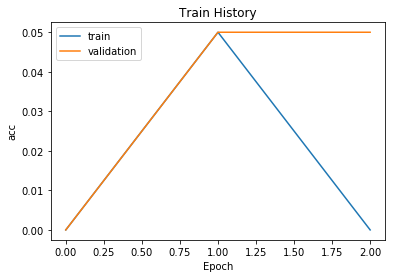

In [27]:
show_train_history(train_history,'acc','val_acc')

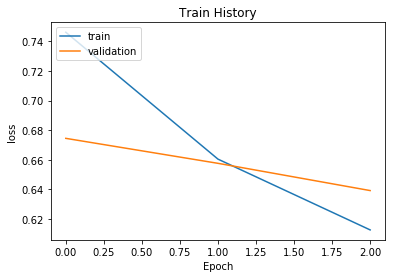

In [28]:
show_train_history(train_history,'loss','val_loss')